## Общее описание:
Есть данные о покупках пользователей.

Данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

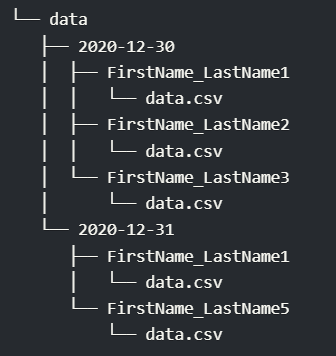

### Описание данных

Данные хранятся в текстовом формате, данные об id товара и количестве приобретенного товара разделены ";".


### План

**1. Подготовка к работе. Создание датафрейма:**
- Импортируем необходимые библиотеки;
- С помощью модуля os получим дерево интересующих нас каталогов с данными в виде списка;
- Используя цикл, будем читать данные построчно и создавать df.
    
**2. Обработка данных. Преобразование данных к нужному типу**

**3. Выясним, какой пользователь купил больше всего товаров**

**4. Найдем топ-10 товаров по числу проданных единиц за всё время и построим барплот**

**5. Визуализируем продажи по дням**

**6. Выясним, сколько пользователей приобрели товары повторно.**

## 1. Подготовка к работе. Импорт необходимых библиотек и создание df 

In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
# Присваиваю переменной путь к файловой системе

path = '../shared/homeworks/python_ds_miniprojects/4/data/'

<b>Собираем df из дерева каталогов</b>

In [3]:
files = list(os.walk(path))

In [4]:
# Вывожу на экран дерево каталогов

files

[('../shared/homeworks/python_ds_miniprojects/4/data/',
  ['2020-12-05',
   '2020-12-08',
   '2020-12-09',
   '2020-12-04',
   '2020-12-06',
   '2020-12-03',
   '2020-12-07'],
  []),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05',
  ['Petr_Ivanov',
   'Petr_Smirnov',
   'Rostislav_Smirnov',
   'Kirill_Smirnov',
   'Alexey_Fedorov',
   'Alexey_Petrov'],
  []),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov',
  [],
  ['data.csv']),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov',
  [],
  ['data.csv']),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov',
  [],
  ['data.csv']),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov',
  [],
  ['data.csv']),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov',
  [],
  ['data.csv']),
 ('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov',
  [],
  ['data.csv']),

In [5]:
# Создаю переменную, которую в дальнейшем буду наполнять значениями из файлов

all_data = []

In [6]:
for path, folders, file in files:
    print(path)
    print(folders)
    if len(file):
        print(file[0])
    print('---------------')

../shared/homeworks/python_ds_miniprojects/4/data/
['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07']
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05
['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov']
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov
[]
data.csv
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov
[]
data.csv
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov
[]
data.csv
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov
[]
data.csv
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov
[]
data.csv
---------------
../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov
[]
data.csv
---------------
../shared/homeworks/python_ds_

In [7]:
# Прохожусь циклом по директориям и файлам и добавляю значения из файлов

for path, _, file in files:
    if not len(file):
        continue
    else:
        data = open(path + '/' + file[0]).readlines()
        print(data)
        data = [el.strip().lstrip(',')[2:].split(',') for el in data]
        data = data[1:]

        name = {"name":path.split('/')[-1]}
        date = {'date': path.split('/')[-2]}
        data.extend([name, date])
        all_data.append(data)


       
        

        
        
    


[',product_id,quantity\n', '0,27,4\n', '1,89,1\n', '2,33,2\n', '3,8,3\n', '4,16,1\n']
[',product_id,quantity\n', '0,55,3\n', '1,49,3\n', '2,22,5\n', '3,83,4\n']
[',product_id,quantity\n', '0,66,2\n', '1,41,5\n', '2,56,4\n']
[',product_id,quantity\n', '0,66,2\n', '1,15,1\n', '2,32,1\n', '3,17,4\n', '4,24,3\n', '5,67,2\n']
[',product_id,quantity\n', '0,13,2\n', '1,50,2\n']
[',product_id,quantity\n', '0,41,4\n', '1,45,2\n', '2,33,1\n']
[',product_id,quantity\n', '0,89,4\n', '1,6,1\n', '2,13,1\n', '3,64,3\n', '4,84,5\n']
[',product_id,quantity\n', '0,36,4\n', '1,24,2\n', '2,23,1\n', '3,27,5\n', '4,32,3\n', '5,50,5\n']
[',product_id,quantity\n', '0,35,4\n']
[',product_id,quantity\n', '0,73,5\n', '1,34,1\n', '2,71,1\n', '3,18,2\n', '4,67,2\n']
[',product_id,quantity\n', '0,6,5\n', '1,34,5\n', '2,18,1\n', '3,28,4\n', '4,40,1\n', '5,17,3\n']
[',product_id,quantity\n', '0,56,5\n', '1,55,1\n', '2,55,5\n', '3,4,4\n', '4,95,1\n']
[',product_id,quantity\n', '0,35,3\n']
[',product_id,quantity\n', '0

In [63]:
# Создаю df на основе названий папок, содержащих имена пользователей и даты покупок

df = []

for i, el in enumerate(all_data):
    quantity_col = []
    product_id_col = []
    for element in el:
        
        if isinstance(element, list) == True:
            product_id_col.append(element[0])
            quantity_col.append(element[1])
        else:
            continue
        
    df1 =pd.DataFrame({
    "product_id": product_id_col,
    "quantity": quantity_col,
    "date": el[-1]['date'],
    "name": el[-2]['name']
            })
    df.append(df1)
df = pd.concat(df)
    


In [109]:
# Вывожу на экран получившийся df 

df.head(25)

,product_id,quantity,date,name,selling_days
0,27,4,2020-12-05,Petr_Ivanov,5
1,89,1,2020-12-05,Petr_Ivanov,5
2,33,2,2020-12-05,Petr_Ivanov,5
3,8,3,2020-12-05,Petr_Ivanov,5
4,16,1,2020-12-05,Petr_Ivanov,5
0,55,3,2020-12-05,Petr_Smirnov,5
1,49,3,2020-12-05,Petr_Smirnov,5
2,22,5,2020-12-05,Petr_Smirnov,5
3,83,4,2020-12-05,Petr_Smirnov,5
0,66,2,2020-12-05,Rostislav_Smirnov,5


<hr style='border:1px solid'>

## 2. Обработка данных. Преобразование данных

In [65]:
df = df.astype({'product_id':'int64','quantity':'int64'})

In [80]:
df['date'] = pd.to_datetime(df['date'])

<hr style='border:1px solid'>

## 3. Выясняем, какой пользователь купил больше всего товаров

In [21]:
# Группируем данные по имени пользователя и для каждого считаем кол-во товаров, сортируем покупки по убыванию

best_buyers = df.groupby('name', as_index=False) \
.agg({'quantity':'sum'}) \
.sort_values('quantity', ascending = False)

In [22]:
best_buyers 

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


<b>Видим, что Alexey_Smirnov и Petr_Smirnov приобрели больше всего товаров </b>

<hr style='border:1px solid'>

## 4. Находим топ-10 товаров по числу проданных единиц за всё время и строим барплот

In [36]:
# Группируем данные по id товара и считаем кол-во проданных по каждому 

top_10_products = df.groupby('product_id', as_index=False) \
.agg({'quantity':'sum'}) \
.sort_values('quantity', ascending=False) \
.head(10) \
.reset_index(drop=True)

In [37]:
top_10_products

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


<b>Строим барплот</b>

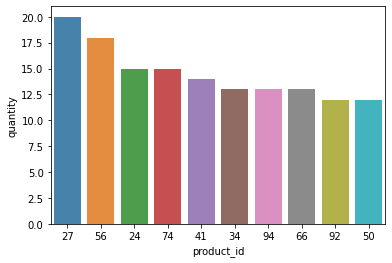

In [53]:
sns.barplot(x='product_id',y='quantity', data=top_10_products, alpha=0.9, order=top_10_products.sort_values('quantity', ascending=False).product_id)

<hr style='border:1px solid'>

## 5. Визуализируем продажи по дням 

In [93]:
# Создаем новый столбец с днем покупки

df['selling_days'] = df.date.dt.day

In [94]:
df

,product_id,quantity,date,name,selling_days
0,27,4,2020-12-05,Petr_Ivanov,5
1,89,1,2020-12-05,Petr_Ivanov,5
2,33,2,2020-12-05,Petr_Ivanov,5
3,8,3,2020-12-05,Petr_Ivanov,5
4,16,1,2020-12-05,Petr_Ivanov,5
...,...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov,7
1,94,4,2020-12-07,Petr_Fedorov,7
0,95,2,2020-12-07,Vasiliy_Ivanov,7
1,83,3,2020-12-07,Vasiliy_Ivanov,7


In [97]:
# Группируем данные по дням покупок

top_days = df.groupby('selling_days', as_index=False) \
.agg({'quantity':'sum'})

In [98]:
top_days

,selling_days,quantity
0,3,60
1,4,113
2,5,61
3,6,15
4,7,94
5,8,68
6,9,69


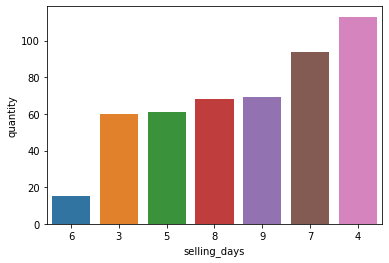

In [102]:
sns.barplot(x='selling_days',y='quantity', data=top_days, order=top_days.sort_values('quantity').selling_days)

<hr style='border:1px solid'>

## 6. Выясняем, сколько пользователей, приобретших товары повторно. Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни

In [134]:
# Удаляем данные о покупках, совершенных одним и тем же пользователем в один день

df_dropped_duplicates = df.drop_duplicates(subset=['product_id','name','date'])

In [135]:
df_dropped_duplicates.head(20)

,product_id,quantity,date,name,selling_days
0,27,4,2020-12-05,Petr_Ivanov,5
1,89,1,2020-12-05,Petr_Ivanov,5
2,33,2,2020-12-05,Petr_Ivanov,5
3,8,3,2020-12-05,Petr_Ivanov,5
4,16,1,2020-12-05,Petr_Ivanov,5
0,55,3,2020-12-05,Petr_Smirnov,5
1,49,3,2020-12-05,Petr_Smirnov,5
2,22,5,2020-12-05,Petr_Smirnov,5
3,83,4,2020-12-05,Petr_Smirnov,5
0,66,2,2020-12-05,Rostislav_Smirnov,5


In [142]:
# Группируем данные по покупателю и id товара и считаем кол-во уникальных дней покупок

secondtime_buyers = removing_duplicates.groupby(['name','product_id'], as_index=False) \
.agg({'selling_days':'nunique'}) \
.query('selling_days > 1')

In [143]:
secondtime_buyers

,name,product_id,selling_days
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


<b>Два пользователя приобрели товары повторно. </b>